## Plots for thesis from training process

In [9]:
import numpy as np
from glob import glob
import os, sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
source_path = '../../../datasets/QM9/xyz_c5h4n2o2/'
all_file_paths = glob(os.path.join(source_path, '*.xyz'))
len(all_file_paths)


509

In [10]:
scripts_path = "../../../scripts"
if scripts_path not in sys.path:
    sys.path.append(scripts_path)
from to_cache import density_fock_overlap

In [15]:
from pyscf import gto, scf
# ret = density_fock_overlap(filepath = '../../../datasets/QM9/xyz_c5h4n2o2/dsgdb9nsd_022700.xyz',
#                          filename = "dsgdb9nsd_022700",
#                          method = "dft",
#                          basis = "sto-3g",
#                          functional = "b3lypg",
#                          guess = "minao",
#                          backend = "pyscf",
#                          cache = "../../../datasets/QM9/out/c5h4n2o2-sto-3g-b3lyp")
mol = gto.M(atom='../../../datasets/QM9/xyz_c5h4n2o2_sorted/dsgdb9nsd_022700.xyz', basis='sto-3g')
mol.basis = 'sto-3g'  # Changing the basis set after initializing the molecule has no effect
mol.build()
mf = scf.RKS(mol)
mf.xc = 'b3lypg'  
mf.kernel()
density = mf.make_rdm1()
overlap = mol.intor('int1e_ovlp')
fock = mf.get_fock()

mo_coeff = mf.mo_coeff
for i in range(mol.nao_nr()): 
    ao_label = mol.ao_labels()[i]
    # print(f"{i}: {ao_label}")


molch4 = gto.M(atom='../../../datasets/QM9/xyz/dsgdb9nsd_000001.xyz', basis='sto-3g')
mfch4 = scf.RKS(molch4)
mfch4.xc = 'b3lypg'  
mfch4.kernel()
densitych4 = mfch4.make_rdm1()
overlapch4 = molch4.intor('int1e_ovlp')
fockch4 = mfch4.get_fock()

converged SCF energy = -446.771228172324
converged SCF energy = -40.0388490933288


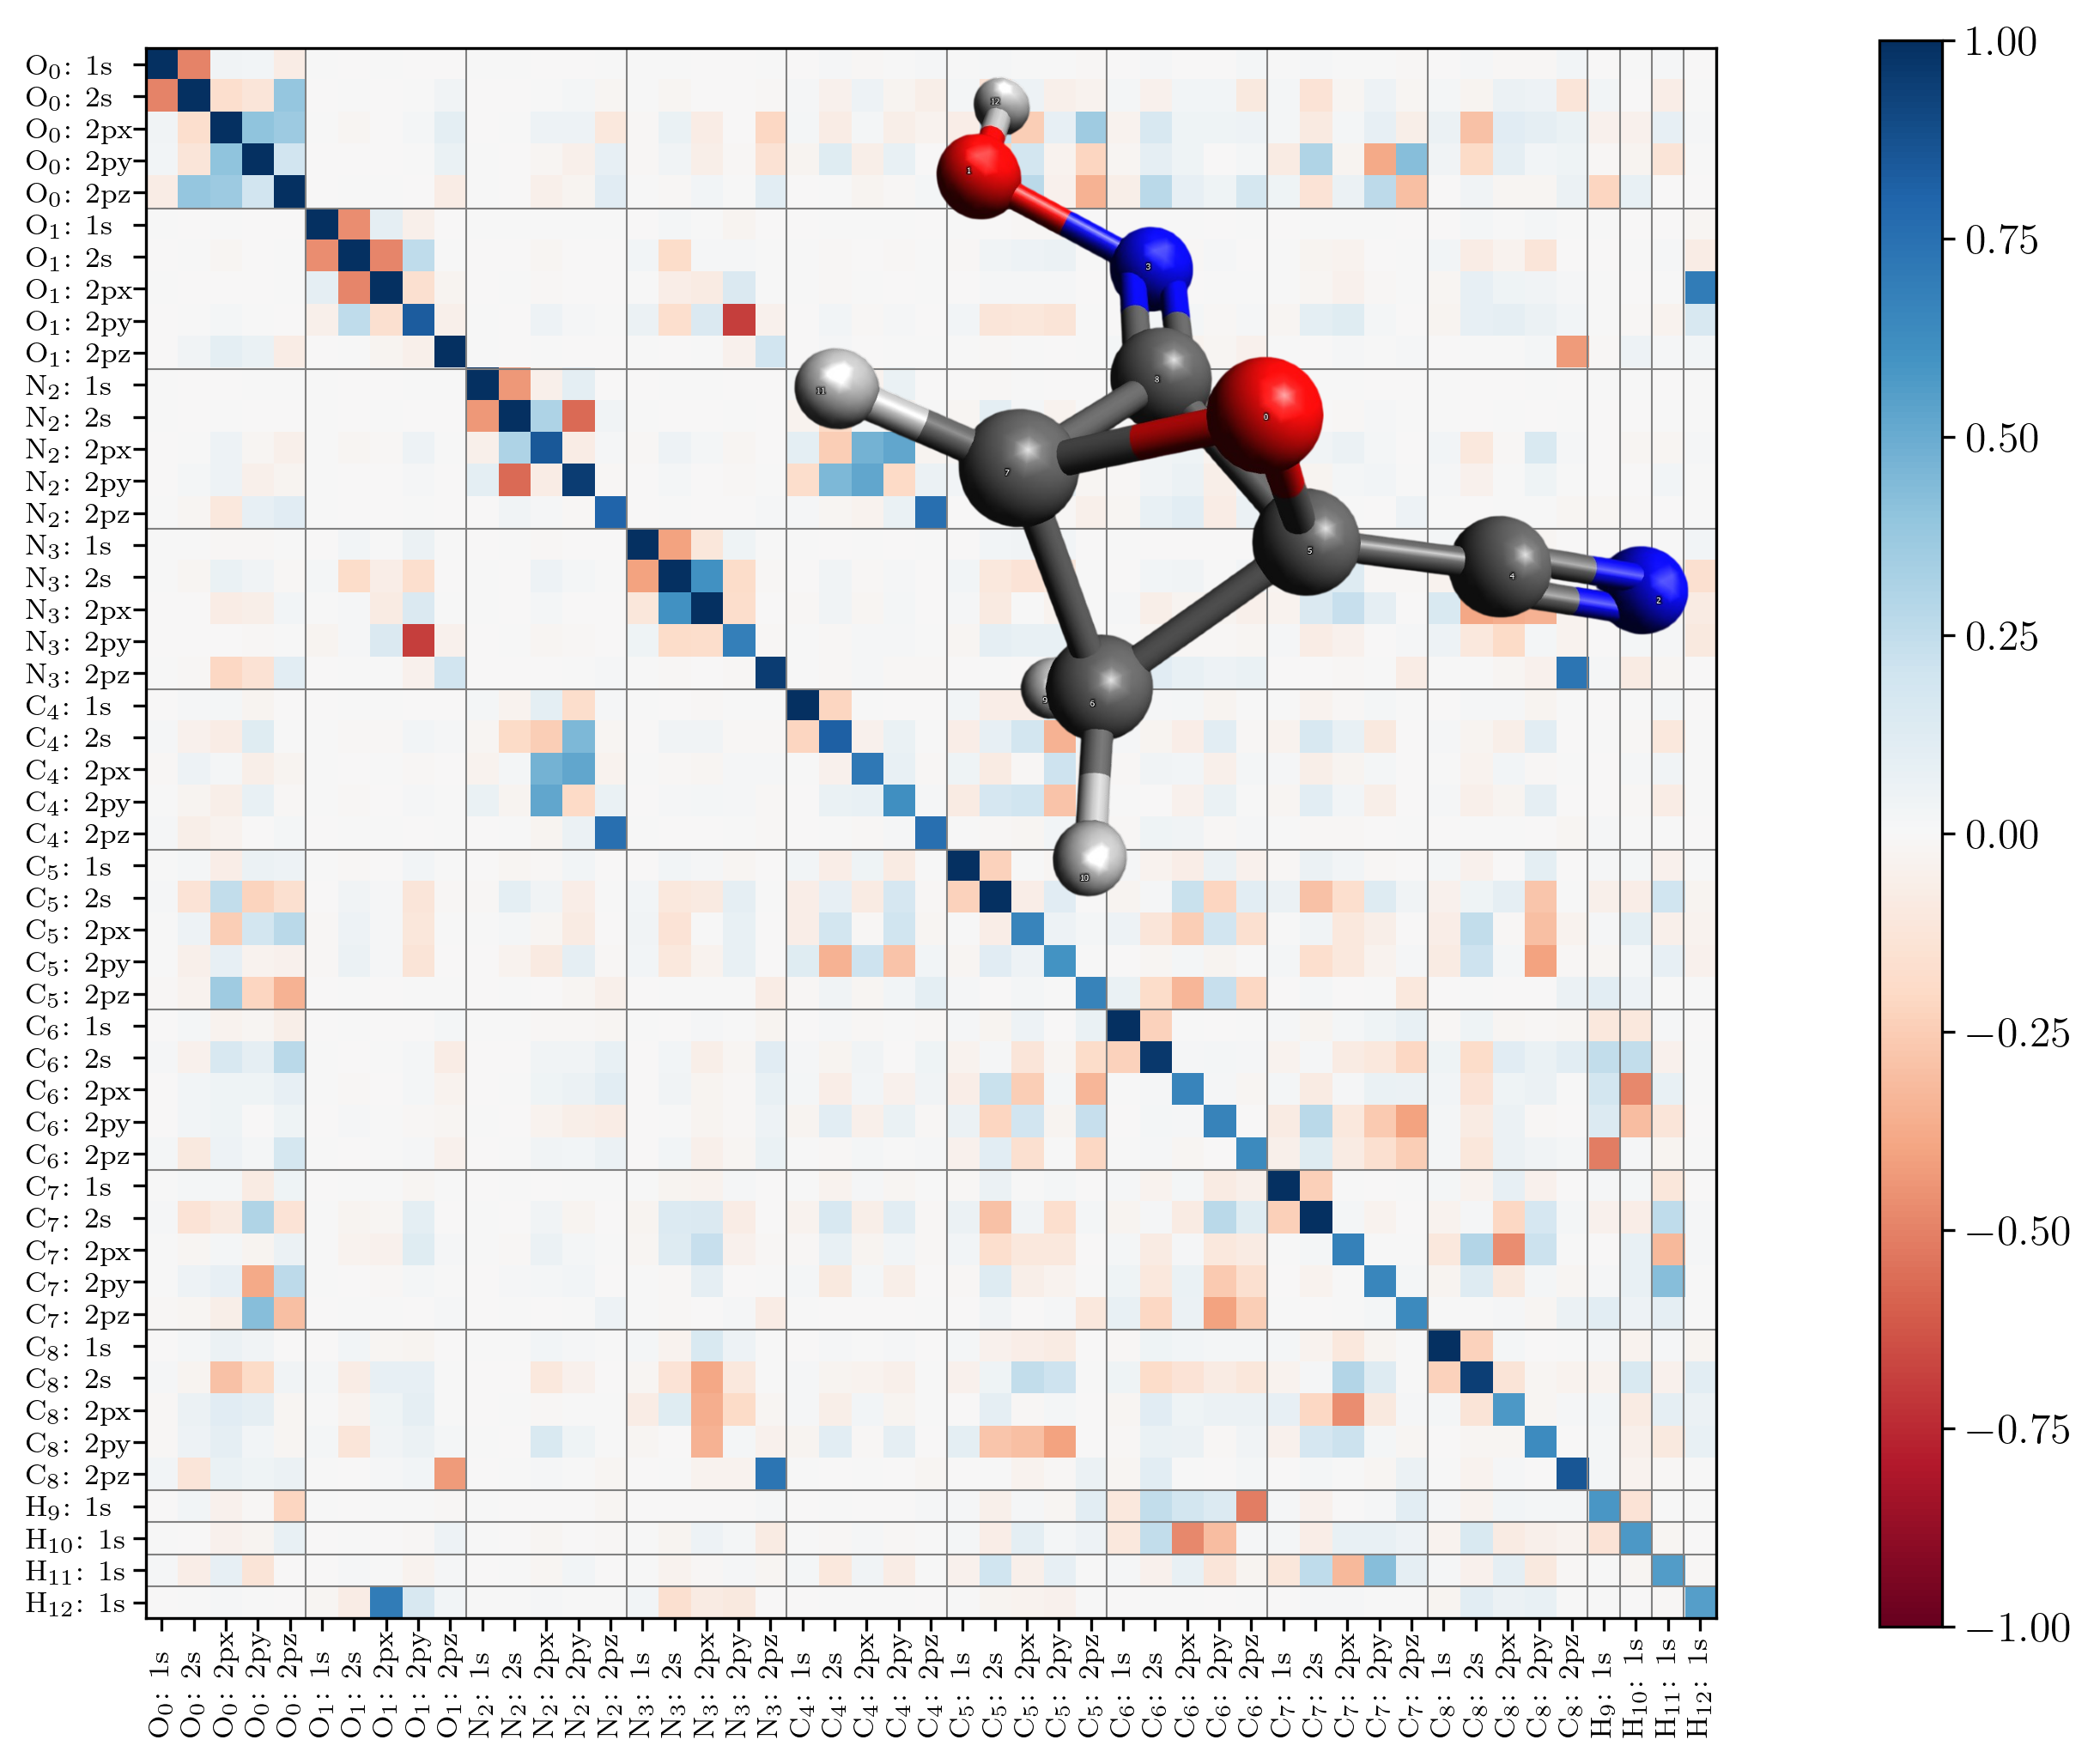

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
sys.path.append("../../scripts/")
from plt_config import use_latex, TU_GREY, TU_RED
use_latex()

def plotwithlabels(X, M, plotname, overlay=None, labels="atoms", colorbar=True, labelsize=8):
    if colorbar:
        fig, ax = plt.subplots(1, 2, figsize=(9, 8), gridspec_kw={'width_ratios': [25, 1]})
    else:
        fig, ax0 = plt.subplots(figsize=(9, 8))
        ax = [ax0]  # damit ax[0] weiterhin funktioniert

    im = ax[0].imshow(X, cmap='RdBu', vmin=-1, vmax=1)

    if labels == "atoms":
        from collections import defaultdict
        atom_groups = defaultdict(list)
        for i, label in enumerate(M.ao_labels()):
            key = ' '.join(label.split()[:2])  # z.B. "2 O"
            atom_groups[key].append(i)

        new_ticks = [np.mean(indices) for indices in atom_groups.values()]
        labels_ = [f"{k.split()[1]}$_{{{k.split()[0]}}}$" for k in atom_groups.keys()]
        ax[0].set_xticks(new_ticks)
        ax[0].set_xticklabels(labels_, rotation=90, fontsize=labelsize, va='bottom')
        ax[0].set_yticks(new_ticks)
        ax[0].set_yticklabels(labels_, fontsize=labelsize, ha='left')
        ax[0].tick_params(axis='x', labelbottom=True, pad=10 + labelsize)
        ax[0].tick_params(axis='y', labelleft=True, pad=10 + labelsize)

    elif labels == "all":
        labels_ = [f"{label.split()[1]}$_{{{label.split()[0]}}}$:\t{{{label.split()[2]}}}" for label in M.ao_labels()]
        ax[0].set_xticks(range(len(labels_)))
        ax[0].set_xticklabels(labels_, rotation=90, fontsize=labelsize, va='bottom')
        ax[0].set_yticks(range(len(labels_)))
        ax[0].set_yticklabels(labels_, fontsize=labelsize, ha='left')
        ax[0].tick_params(axis='x', labelbottom=True, pad=30)
        ax[0].tick_params(axis='y', labelleft=True, pad=30)

    ax[0].grid(False)

    ao_labels = M.ao_labels()
    atom_names = [label.split()[1] + label.split()[0] for label in ao_labels]
    boundaries = [i for i in range(1, len(atom_names)) if atom_names[i] != atom_names[i-1]]
    for b in boundaries:
        ax[0].axhline(b - 0.5, color='gray', lw=0.5)
        ax[0].axvline(b - 0.5, color='gray', lw=0.5)

    if colorbar:
        cb = plt.colorbar(im, cax=ax[1])
        cb.ax.tick_params(labelsize=12)
        cb.ax.grid(False)

    if overlay is not None:
        overlay_img = mpimg.imread(overlay)
        imagebox = OffsetImage(overlay_img, zoom=0.21)
        ab = AnnotationBbox(imagebox, (0.69, 0.72), frameon=False, xycoords='axes fraction')
        ax[0].add_artist(ab)

    plt.savefig(f"../../fig/c5h4n2o2/{plotname}.pdf", bbox_inches="tight", dpi=600)

plotwithlabels(density, mol, "density_dsgdb9nsd_022700", 
               overlay="../../fig/c5h4n2o2/dsgdb9nsd_022700_structure_nobg.png", labels="all")
# plotwithlabels(overlap, mol, "overlap_dsgdb9nsd_022700", colorbar=False)

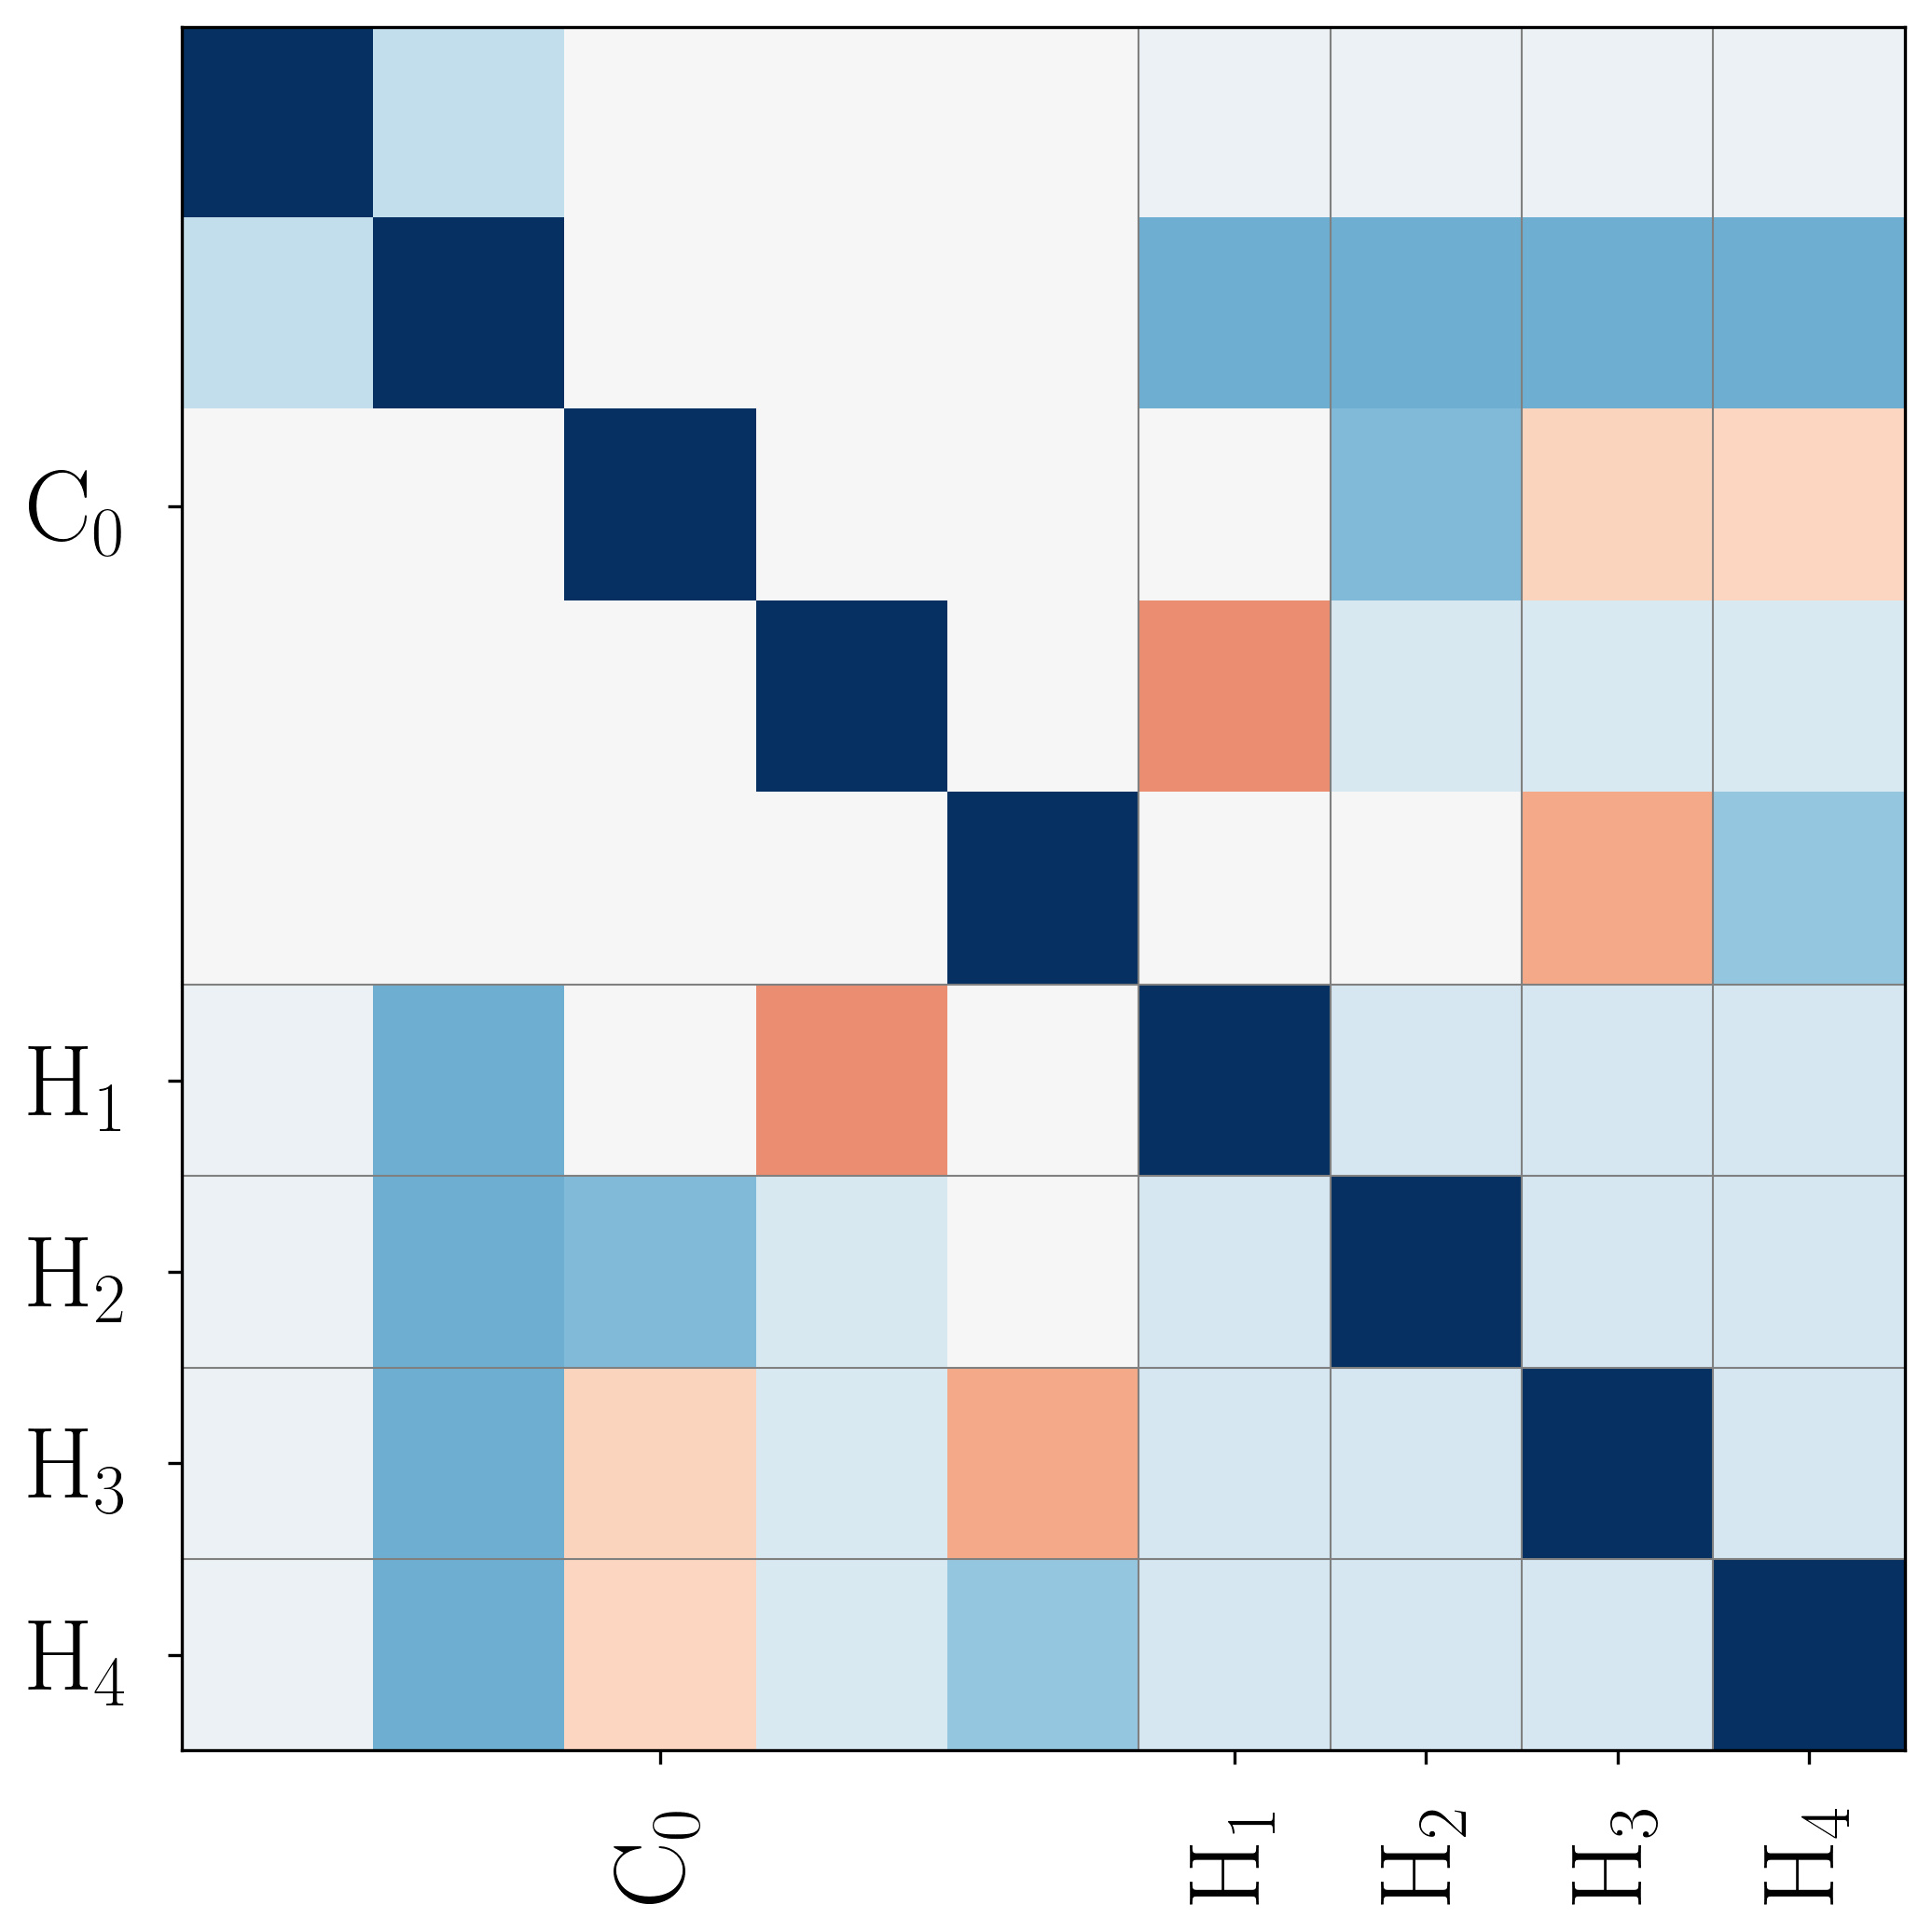

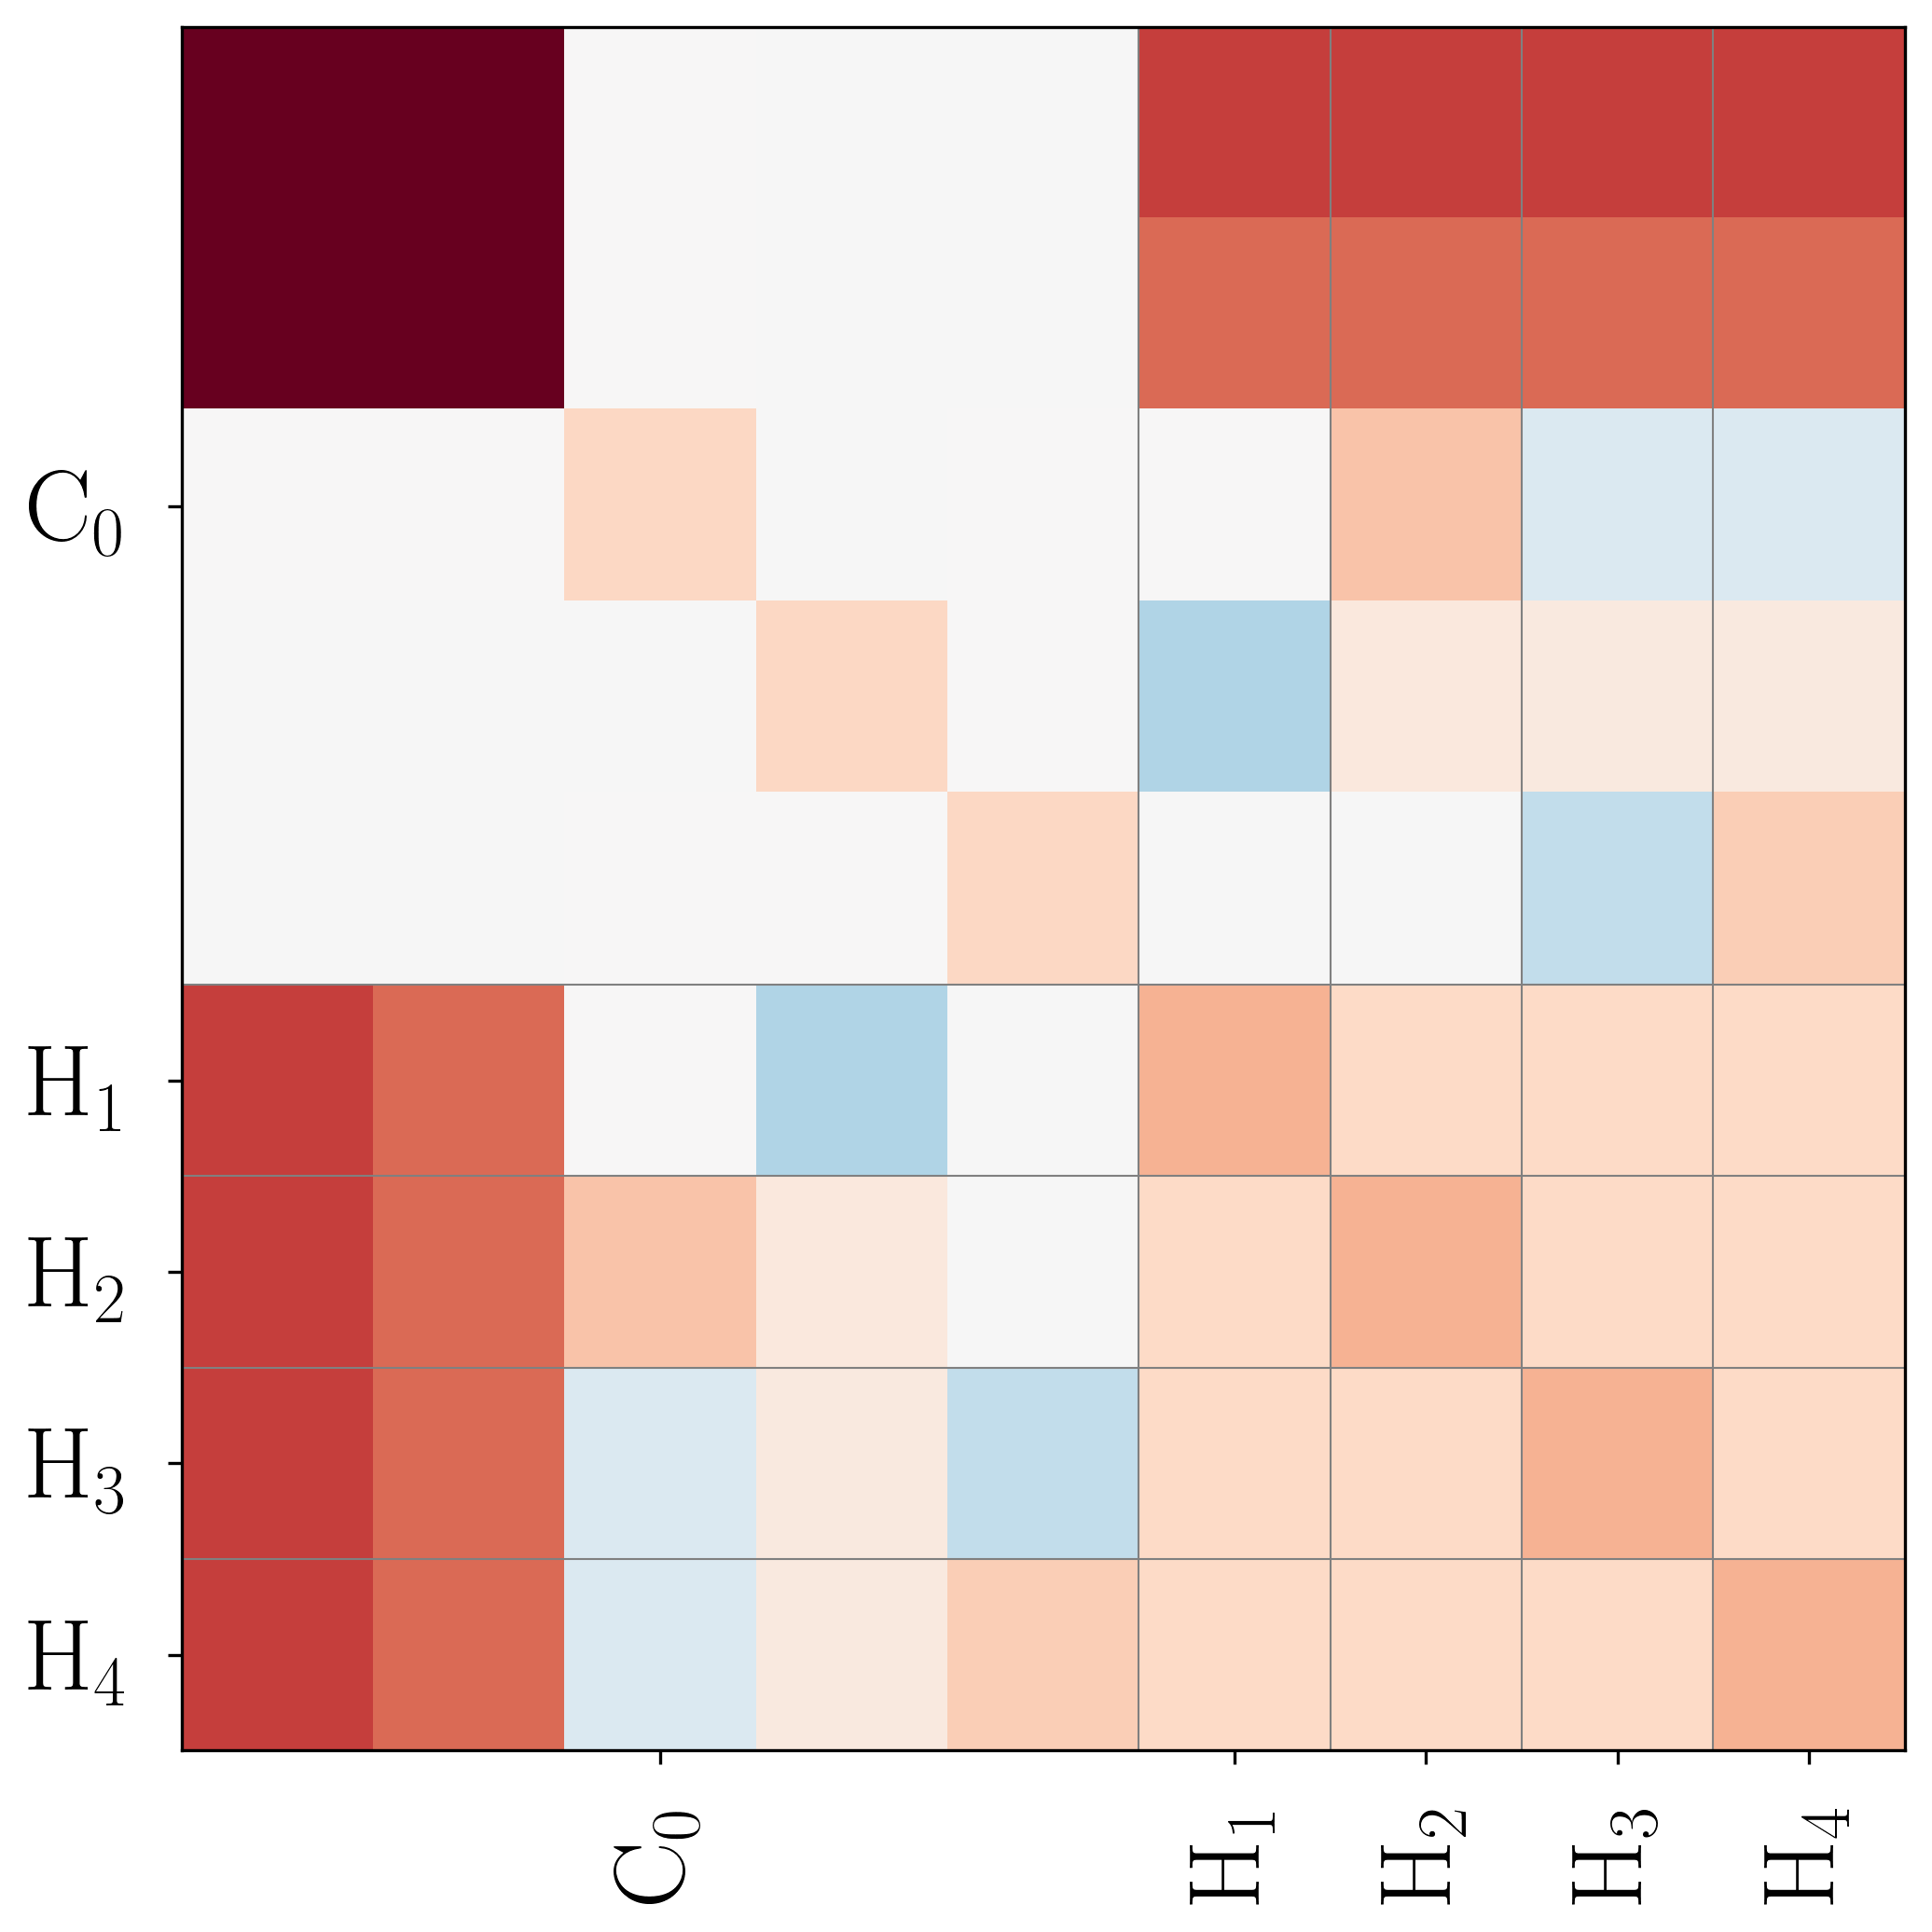

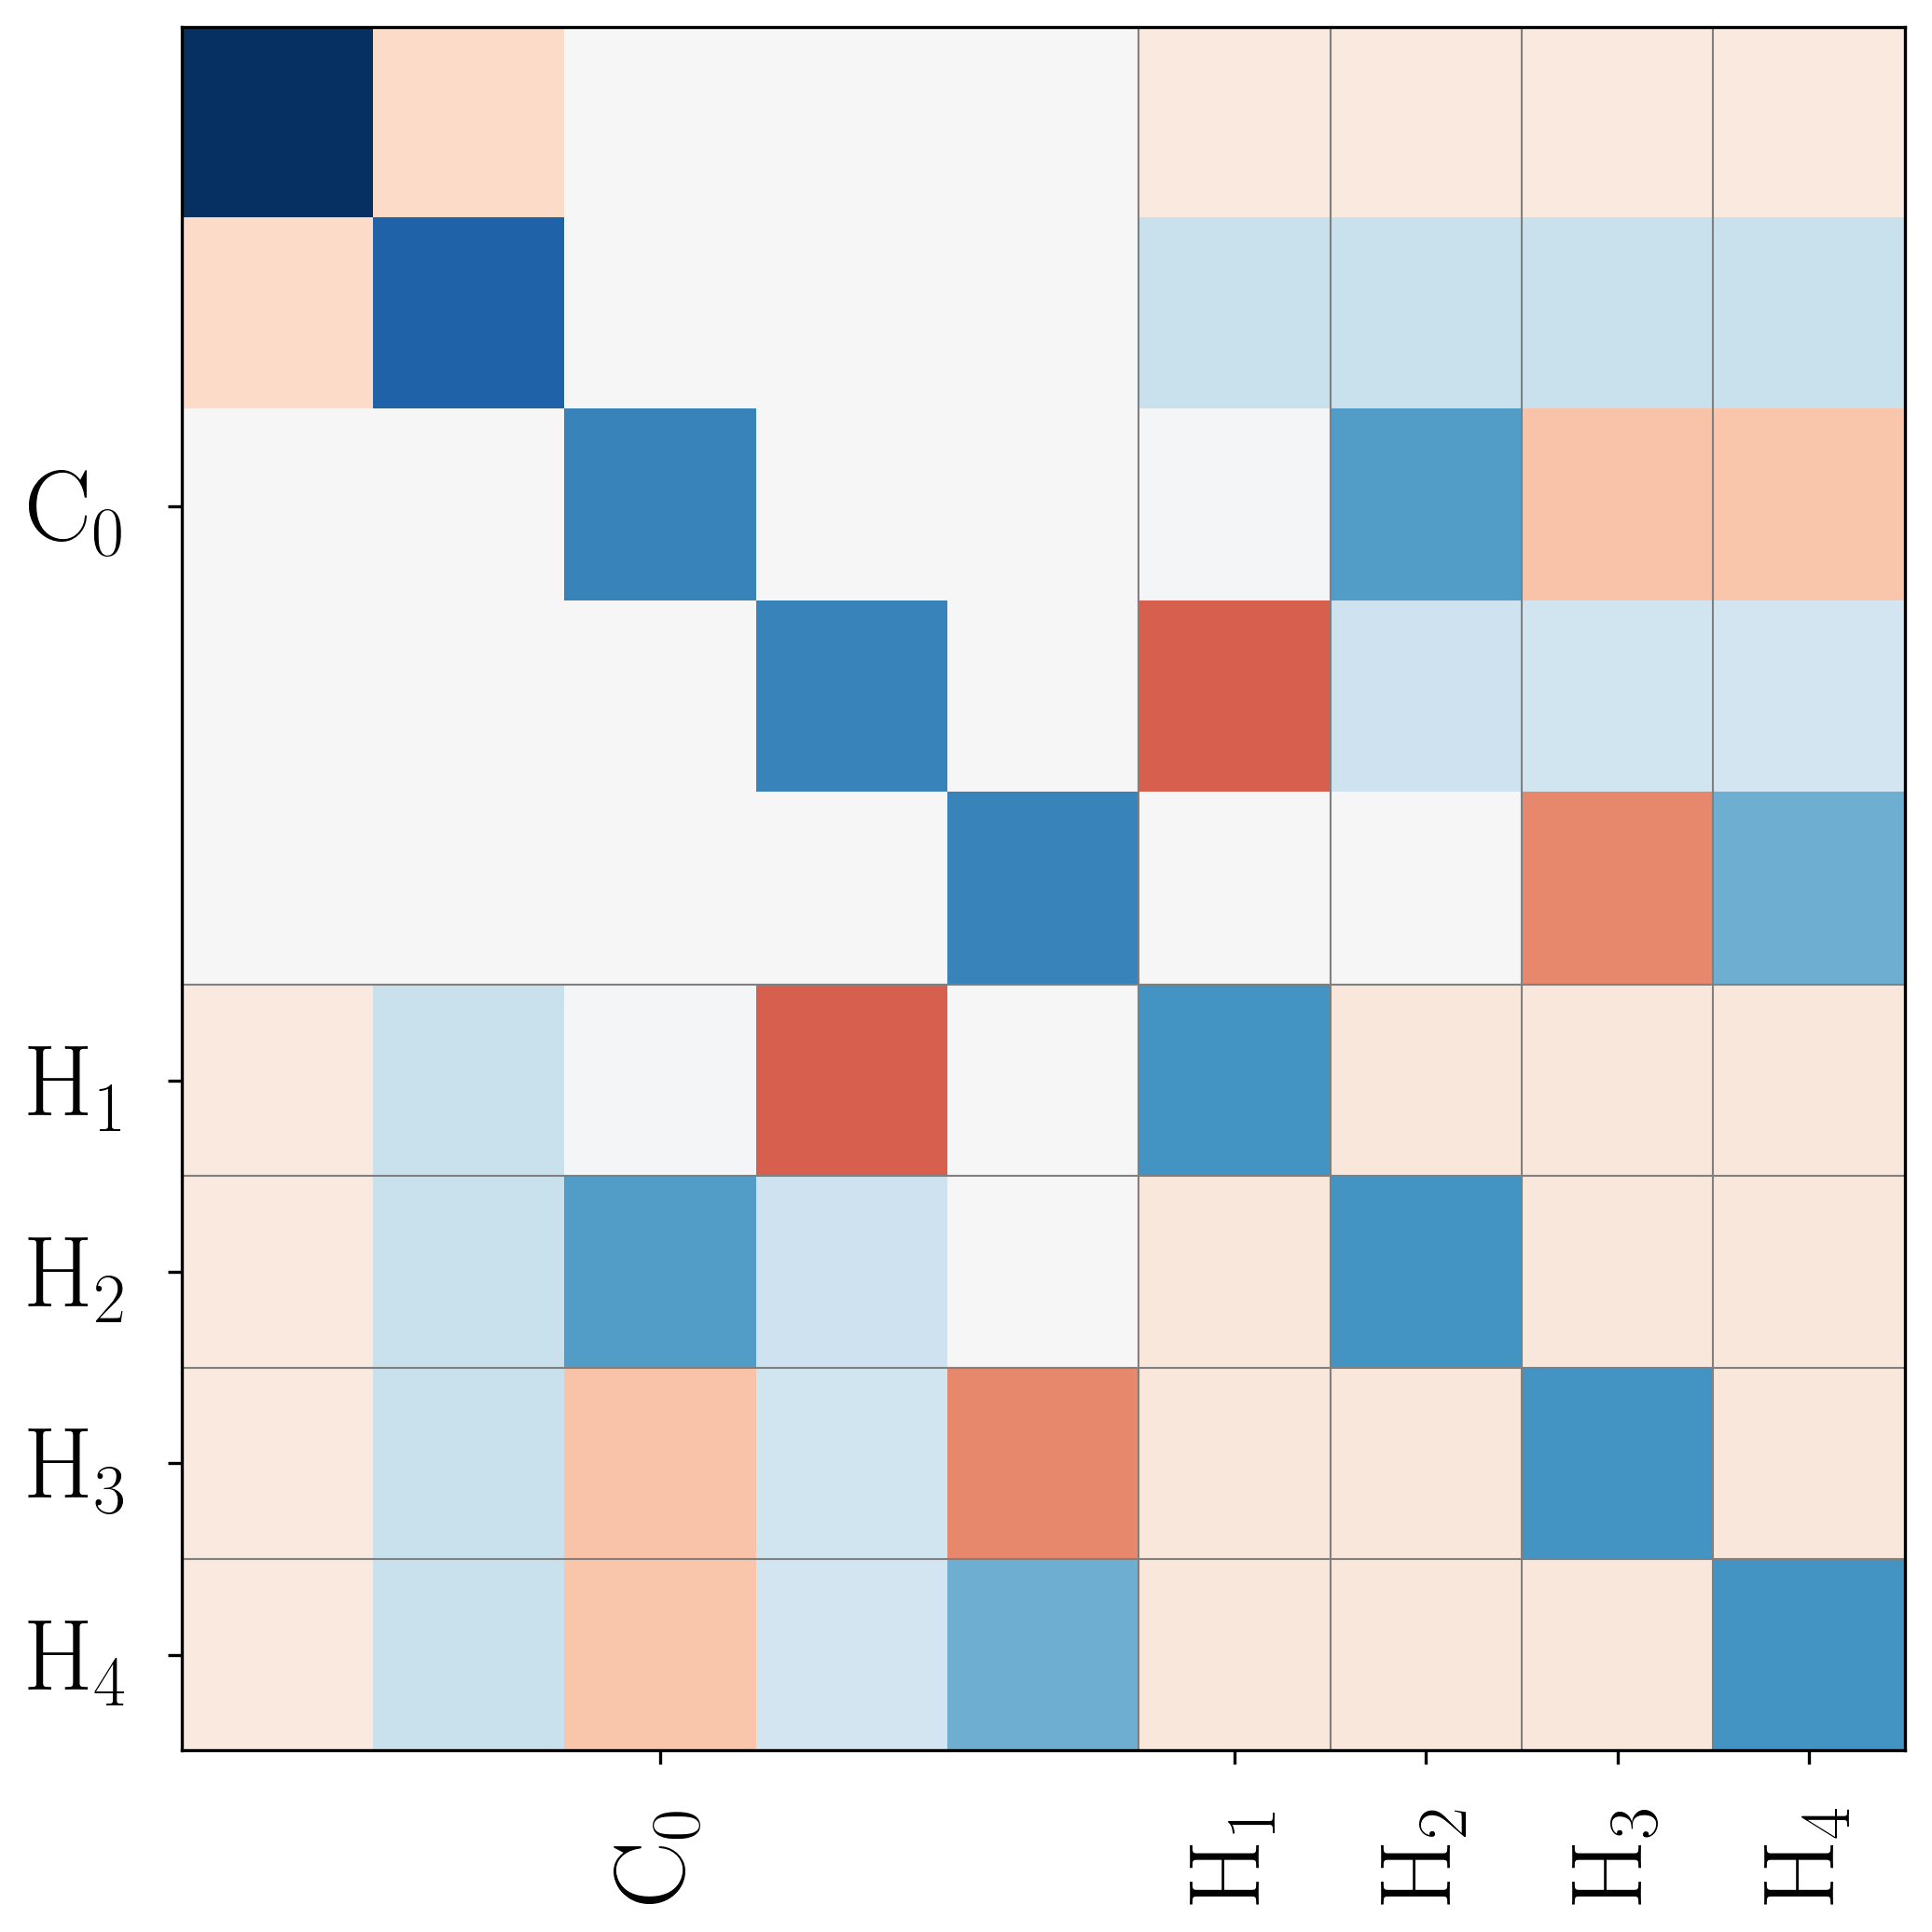

In [13]:
plotwithlabels(overlapch4, molch4, "overlap_dsgdb9nsd_000001", colorbar=False, labelsize=26)
plotwithlabels(fockch4, molch4, "fock_dsgdb9nsd_000001", colorbar=False, labelsize=26)
plotwithlabels(densitych4, molch4, "density_dsgdb9nsd_000001", colorbar=False, labelsize=26)